In [78]:
# https://www.geeksforgeeks.org/machine-learning/time-series-forecasting-using-recurrent-neural-networks-rnn-in-tensorflow/

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pip install yfinance
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [80]:
# ticker is the Yahoo's abbreviation of the company (whose stocks we inspect)
# to see which ticker is which company, try: https://finance.yahoo.com/lookup/
ticker = 'AMD' 
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
data = data['Close'].values.reshape(-1, 1)

C:\Users\tuomas.valtanen\AppData\Local\Temp\ipykernel_20148\2153640913.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [81]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [82]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [83]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [84]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\tuomas.valtanen\DL2025lecturenotes2\DeepLearning2025\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [85]:
model.fit(X_train, y_train, epochs=20, batch_size=64)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0875
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011    
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.9390e-04
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010    
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6369e-04
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0971e-04
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3197e-04
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2799e-04
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss

In [86]:
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_unscaled, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_unscaled, predictions)

print(f"Unscaled Mean Squared Error (MSE): {mse}")
print(f"Unscaled Root Mean Squared Error (RMSE): {rmse}")
print(f"Unscaled Mean Absolute Error (MAE): {mae}")

Unscaled Mean Squared Error (MSE): 49.953196596914495
Unscaled Root Mean Squared Error (RMSE): 7.067757536652945
Unscaled Mean Absolute Error (MAE): 5.448124504089355


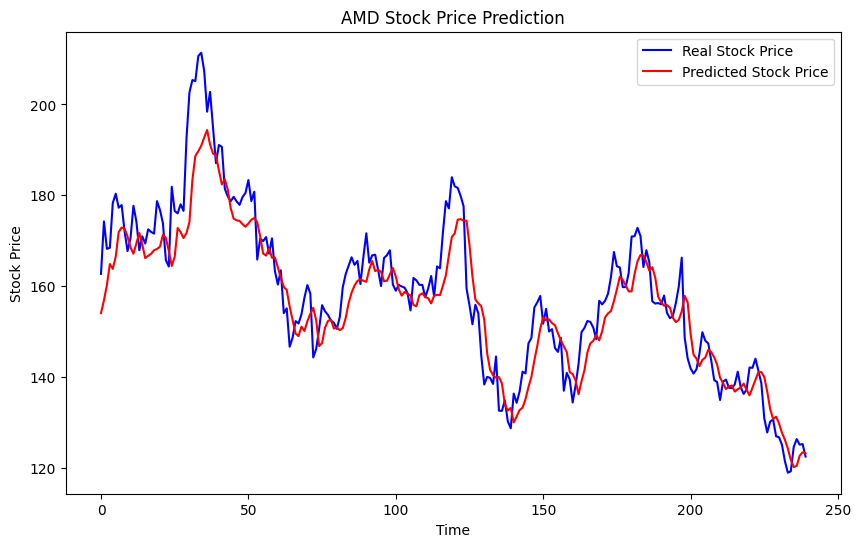

In [87]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Remember, if you use forecasting into tomorrow's data, you never have any comparison if it's good or not

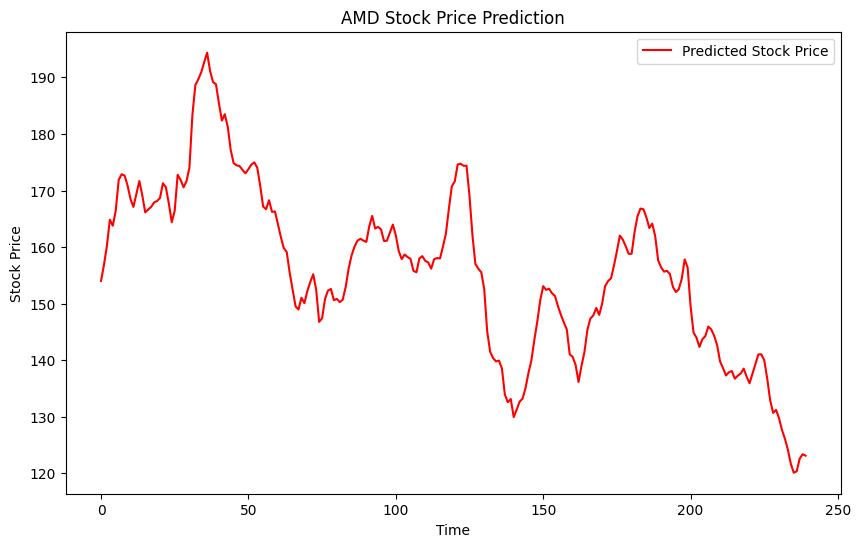

In [88]:
plt.figure(figsize=(10,6))
#plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()